In [1]:
# first lets import all the libraries we will need 
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score,recall_score, f1_score, classification_report, confusion_matrix, accuracy_score

# importing graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing other things we will need
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

#importing necessary models
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
import re


In [2]:
# load the dataset downloaded from the kaggle site
train = pd.read_csv(r'C:/Users/HP/Downloads/train (1).csv')
test = pd.read_csv(r'C:/Users/HP/Downloads/test (1).csv')

In [3]:
#checking the columns we have in the train dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# checking the columns we have in the test dataset
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# checking the train dataset shape
train.shape

(891, 12)

In [6]:
# checking the test dataset shap
test.shape

(418, 11)

In [7]:
# Remove duplicates
train = train.drop_duplicates()
test= test.drop_duplicates()

In [8]:
# a function to check for missing values
def missing_values(df):
    start_isna_sum = test.isna().sum().sort_values(ascending=False)
    print (start_isna_sum)

In [9]:
# checking for missing data in the train dataset
missing_values(train)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


In [10]:
# checking for missing data in the test dataset
missing_values(test)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


In [11]:
# since train and test dataset are the same
# use train dataset to fill the missing values in test dataset and vice-versa
test['Fare'].fillna(train['Fare'], inplace=True)
train['Embarked'].fillna(test['Embarked'], inplace=True)

train['Cabin'].fillna(test['Cabin'], inplace=True)
train['Age'].fillna(test['Age'], inplace=True)

test['Cabin'].fillna(train['Cabin'], inplace=True)
test['Age'].fillna(train['Age'], inplace=True)

In [12]:
missing_values(train)

Cabin          249
Age             16
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [13]:
missing_values(test)

Cabin          249
Age             16
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [14]:
# using mean to fill the missing age data
train['Age'].fillna(train['Age']. mean(), inplace=True)
test['Age'].fillna(test['Age'].mean() , inplace=True)


In [15]:
# filling embarked missing data with the most frequent value
train['Embarked'].fillna(train['Embarked']. mode() [0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode() [0], inplace=True)

In [16]:
# checking unique values in the cabin column
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'B45', 'E31', 'D56', 'A6',
       'B57 B59 B63 B66', 'B36', 'C23 C25 C27', 'A21', 'B78', 'C78',
       'D34', 'D19', 'A9', 'D15', 'C31', 'D33', 'B30', 'C52', 'F G63',
       'B61', 'B28', 'C83', 'F33', 'C53', 'D43', 'C130', 'F G73', 'C101',
       'C55 C57', 'A5', 'D10 D12', 'C116', 'D26', 'F', 'C110', 'A29',
       'B58 B60', 'C28', 'E101', 'F E69', 'C51', 'D47', 'B86', 'F2',
       'C54', 'C2', 'C97', 'D22', 'E33', 'B19', 'A7', 'C49', 'F4', 'E45',
       'E52', 'D30', 'A32', 'B4', 'B80', 'E34', 'C62 C64', 'A11', 'A31',
       'D36', 'C93', 'D37', 'C86', 'D35', 'C87', 'B77', 'E67', 'B94',
       'C125', 'C99', 'C6', 'C89', 'C118', 'D7', 'A19', 'F E46', 'B49',
       'D', 'A34', 'C22 C26', 'C106', 'C65', 'B69', 'E36', 'C32', 'C7',
       'F E57', 'B18', 'C124', 'C91', 'E40', 'T', 'B51 B53 B55', 'C128',
       'E60', 'E50', 'B35', 'E39 E41', 'B52 B54 B56', 'C82', 'C39',
       'B96 B98', 'D28', 'B41', 'D40', 'D38', 'C80', 'C105', 'E10', 'E

In [17]:
# filling cabin missing data with the most frequent cabin number
train['Cabin'].fillna(train['Cabin']. mode() [0], inplace=True)
test['Cabin'].fillna(test['Cabin'].mode() [0], inplace=True)

In [18]:
# extract the first letter (deck) from the cabin column
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

# replace T with G 
train['Deck']= train['Deck'].replace('T', 'G')
test['Deck']= test['Deck'].replace('T', 'G')

In [19]:
# checking the cabin column
print(train[['Cabin', 'Deck']].head())

         Cabin Deck
0  C23 C25 C27    C
1          C85    C
2  C23 C25 C27    C
3         C123    C
4  C23 C25 C27    C


Data Analysis and Visualization for Train dataset

In [20]:
# statistical measures
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.651844,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.565039,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.651844,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Did'nt Survive    549
Survived          342
Name: Survived, dtype: int64


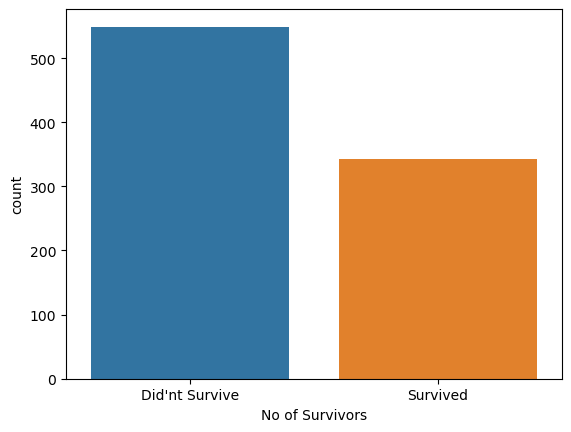

In [21]:
# number of people that survived
print(train['Survived'].replace({0: "Did'nt Survive", 1: 'Survived'}).value_counts())

sns.countplot(x=train['Survived'].replace({0: "Did'nt Survive", 1: 'Survived'}))
plt.xlabel('No of Survivors')  
plt.show()

male      577
female    314
Name: Sex, dtype: int64


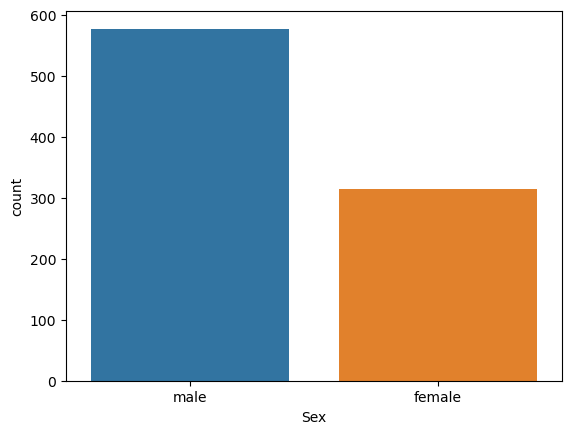

In [22]:
# number of male and female
print(train['Sex'].replace({0: 'Female', 1: 'Male'}).value_counts())

sns.countplot(x=train['Sex'].replace({0: 'Female', 1: 'Male'}))
plt.xlabel('Sex')  
plt.show()



<Axes: xlabel='Sex', ylabel='count'>

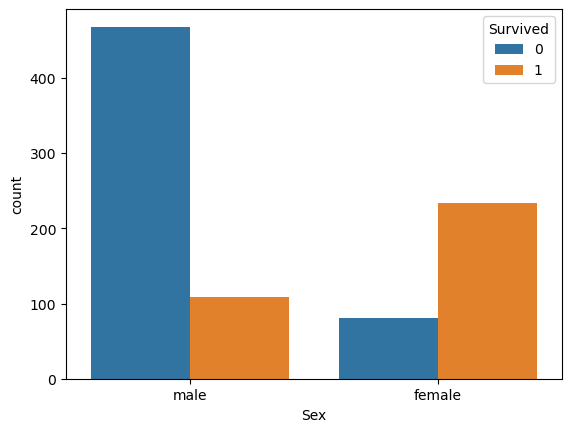

In [23]:
# display of the survival rate by sex
sns.countplot(x= 'Sex', hue='Survived', data= train)

<Axes: xlabel='Pclass', ylabel='count'>

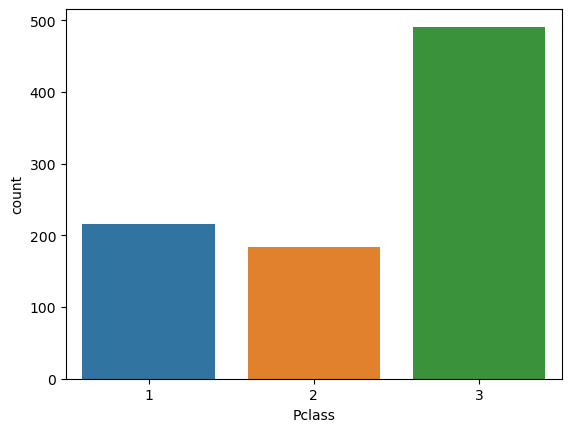

In [24]:
# number of ticket class on ship
sns.countplot(x='Pclass', data= train)

<Axes: xlabel='Pclass', ylabel='count'>

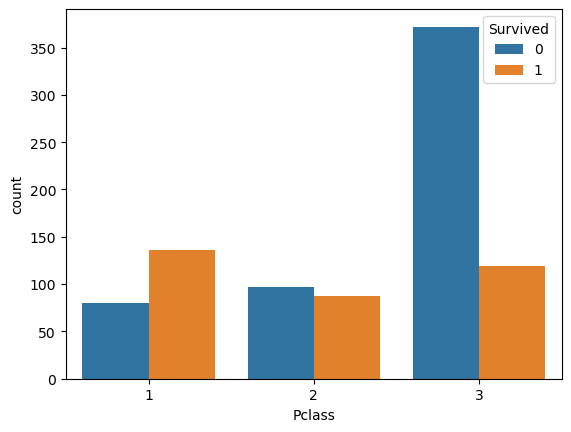

In [25]:
# display of the survival rate by ticket class
sns.countplot(x= 'Pclass', hue='Survived', data= train)

In [26]:
# Checking the correlation between features and the target variable 'Survived'
correlation_matrix = train.corr()
print(correlation_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.050984
Pclass        -0.338481
Name: Survived, dtype: float64


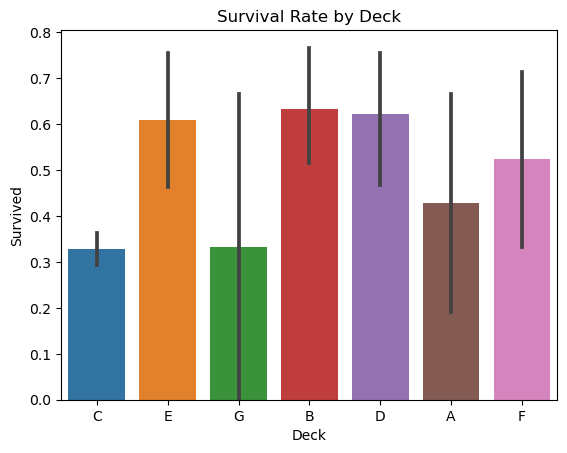

In [27]:
# Creating a bar plot to visualize the survival rate by deck
sns.barplot(x= 'Deck', y= 'Survived', data=  train)
plt.title('Survival Rate by Deck')
plt.show()

Encoding Categorical column

In [28]:
# Categorical columns are Survived (Binary), Sex, Embarked, Pclass
# lets replace the values of Sex and Embarked 

train.replace({'Sex': {'male': 0 , 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace= True )
test.replace({'Sex': {'male': 0 , 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace= True )


In [29]:
# One-hot encode the Deck column
train = pd.get_dummies(train, columns=['Deck'], prefix='Deck', dummy_na=True)
test = pd.get_dummies(test, columns=['Deck'], prefix='Deck', dummy_na=True)

Separating Features and Target variable

In [30]:
# separating features and target variable 
X= train.drop(columns=['Name', 'Ticket', 'Survived', 'PassengerId', 'Cabin'], axis=1)
Y= train['Survived']

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_nan
0,3,0,22.000000,1,0,7.2500,0,0,0,1,0,0,0,0,0
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0,0,0,0,0
2,3,1,26.000000,0,0,7.9250,0,0,0,1,0,0,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,0,1,0,0,0,0,0
4,3,0,35.000000,0,0,8.0500,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0,0,1,0,0,0,0,0
887,1,1,19.000000,0,0,30.0000,0,0,1,0,0,0,0,0,0
888,3,1,29.651844,1,2,23.4500,0,0,0,1,0,0,0,0,0
889,1,0,26.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0


In [32]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Splitting the data into test and train data

In [33]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=2)


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Model Training


Logistic Regression

In [35]:
model= LogisticRegression()

In [36]:
# training the logistic regression model with the validation set
model.fit(X_train, y_train)


LogisticRegression()

Model Evaluation

 Accuracy Score


In [37]:
# accuracy on training data
X_train_prediction= model.predict(X_train)

In [38]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 

In [39]:
train_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data:' , train_data_accuracy)

Accuracy score of training data: 0.8160112359550562


In [40]:
# Accuracy on test data
X_test_prediction= model.predict(X_val)

In [41]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [42]:
test_data_accuracy = accuracy_score(y_val, X_test_prediction)
print('Accuracy score of test data:' , test_data_accuracy)

Accuracy score of test data: 0.7877094972067039


In [43]:
print("Precision:", precision_score(y_val, X_test_prediction))
print("Recall:", recall_score(y_val, X_test_prediction))
print("F1-Score:", f1_score(y_val, X_test_prediction))

print("Classification Report:\n", classification_report(y_val, X_test_prediction))


Precision: 0.8596491228070176
Recall: 0.620253164556962
F1-Score: 0.7205882352941176
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       100
           1       0.86      0.62      0.72        79

    accuracy                           0.79       179
   macro avg       0.81      0.77      0.77       179
weighted avg       0.80      0.79      0.78       179



This model is better at predicting passengers who didn’t survive (class 0) compared to those who did (class 1), as seen in the higher recall and F1-score for class 0.

The precision for class 1 (survived) is quite high, meaning when it does predict survival, it's often correct. However, the recall for class 1 is lower, meaning it misses quite a few actual survivors.


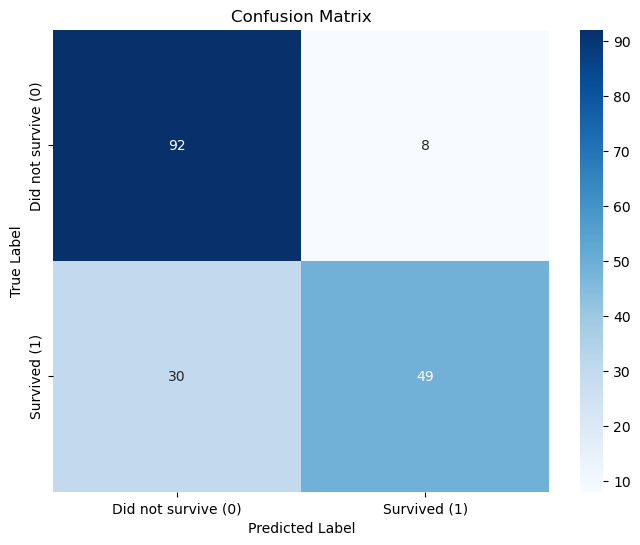

In [44]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, X_test_prediction)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive (0)', 'Survived (1)'], yticklabels=['Did not survive (0)', 'Survived (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix above shows the model's classification performance. We can observe:

True Negatives (92): The number of passengers correctly predicted as not surviving.

False Positives (8): The number of passengers incorrectly predicted to survive, though they didn't.

False Negatives (30): The number of passengers incorrectly predicted as not surviving, though they did.

True Positives (49): The number of passengers correctly predicted to survive.

This matrix indicates that while the model is relatively good at predicting non-survivors (92 correct predictions), it struggles more with predicting survivors (30 incorrect predictions), which aligns with the earlier recall score of 0.62 for the survivors (class 1).